In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [2]:
# define # of nearest neighbors
n_clusters = 2

In [3]:
# read in features csv file
df = pd.read_csv('kundalini/k_pca_features.csv')
df

,PC1,PC2,PC3,PC4,label
0,1.919234,1.225710,-1.287233,0.285046,k_pre
1,1.629080,-0.495292,-0.689883,0.365053,k_pre
2,2.341778,-1.181016,-0.758231,0.174319,k_pre
3,1.229193,0.930177,-0.746822,0.327738,k_pre
4,1.881406,-0.417269,-0.858387,0.351611,k_pre
...,...,...,...,...,...
91,-0.584261,3.824609,-0.579344,-0.546390,k_med
92,-0.489981,2.892255,0.260431,-0.950496,k_med
93,-2.153267,2.608921,0.641948,-0.166193,k_med
94,-0.443943,3.236324,-0.394600,-0.524103,k_med


In [4]:
# encode meditative/non-meditative labels
categories = {'k_pre':0,'k_med':1}
df['label'] = df['label'].replace(categories)
df

,PC1,PC2,PC3,PC4,label
0,1.919234,1.225710,-1.287233,0.285046,0
1,1.629080,-0.495292,-0.689883,0.365053,0
2,2.341778,-1.181016,-0.758231,0.174319,0
3,1.229193,0.930177,-0.746822,0.327738,0
4,1.881406,-0.417269,-0.858387,0.351611,0
...,...,...,...,...,...
91,-0.584261,3.824609,-0.579344,-0.546390,1
92,-0.489981,2.892255,0.260431,-0.950496,1
93,-2.153267,2.608921,0.641948,-0.166193,1
94,-0.443943,3.236324,-0.394600,-0.524103,1


In [5]:
# split dependent and independent variables
# target variable
Y = df['label'].values
# features
X = df.drop(labels = ['label'], axis = 1)
features_list = list(X.columns)

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [6]:
# split training and testing dataset: 70% training, 30% testing
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

# Unsupervised Learning: K Means

In [7]:
#create the classifier
clf = KMeans(n_clusters=2, random_state=0)
# train the classifier
clf.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [8]:
# test classifier

y_pred = clf.predict(X_test)

In [9]:
# analyze test_data
# display results in confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

results = pd.crosstab(y_test, y_pred, colnames=['Predicted / Actual'])
results = results.rename(columns={0: 'Non-Meditative', 1: 'Meditative'})
results.index = ['Non-Meditative', 'Meditative']
results

Predicted / Actual,Non-Meditative,Meditative
Non-Meditative,0,17
Meditative,3,9


In [10]:
target_names = ['Non-Meditative', 'Meditative']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Non-Meditative       0.00      0.00      0.00        17
    Meditative       0.35      0.75      0.47        12

      accuracy                           0.31        29
     macro avg       0.17      0.38      0.24        29
  weighted avg       0.14      0.31      0.20        29



In [11]:
# store metrics for comparision amongst other k-nearest-neighbor classifier outputs later
overall_rec = []
overall_acc = []
overall_pre = []
overall_mcc = []
overall_spc = []

# obtain metrics for model
recall = metrics.recall_score(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
mcc = metrics.matthews_corrcoef(y_test,y_pred)
specificity = metrics.balanced_accuracy_score(y_test,y_pred)*2 - recall

overall_rec.append(recall)
overall_acc.append(accuracy)
overall_pre.append(precision)
overall_mcc.append(mcc)
overall_spc.append(specificity)

# display metrics
print('K-means - Chi+Kundalini (post-pca)\n')
print('Sensitivity = %.3f' % recall)
print('Accuracy = %.3f' % accuracy)
print('Precision = %.3f' % precision)
print('Matthew Correlation Coefficient = %.3f' % mcc)

K-means - Chi+Kundalini (post-pca)

Sensitivity = 0.750
Accuracy = 0.310
Precision = 0.346
Matthew Correlation Coefficient = -0.404


# Supervised Learning: K Nearest Neighbors

## 5 Neighbors, Distance

In [12]:
#create the classifier
clf = neighbors.KNeighborsClassifier(n_neighbors = 5, weights="distance")

In [13]:
# train the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [14]:
# test classifier

y_pred = clf.predict(X_test)

In [15]:
# analyze test_data
# display results in confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

results = pd.crosstab(y_test, y_pred, colnames=['Predicted / Actual'])
results = results.rename(columns={0: 'Non-Meditative', 1: 'Meditative'})
results.index = ['Non-Meditative', 'Meditative']
results

Predicted / Actual,Non-Meditative,Meditative
Non-Meditative,13,4
Meditative,0,12


In [16]:
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Non-Meditative       1.00      0.76      0.87        17
    Meditative       0.75      1.00      0.86        12

      accuracy                           0.86        29
     macro avg       0.88      0.88      0.86        29
  weighted avg       0.90      0.86      0.86        29



In [17]:
knn_rec = []
knn_acc = []
knn_pre = []
knn_mcc = []

# obtain metrics for model
recall = metrics.recall_score(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
mcc = metrics.matthews_corrcoef(y_test,y_pred)

knn_rec.append(recall)
knn_acc.append(accuracy)
knn_pre.append(precision)
knn_mcc.append(mcc)

# display metrics
print('K-means\n')
print('Sensitivity = %.3f' % recall)
print('Accuracy = %.3f' % accuracy)
print('Precision = %.3f' % precision)
print('Matthew Correlation Coefficient = %.3f' % mcc)

K-means

Sensitivity = 1.000
Accuracy = 0.862
Precision = 0.750
Matthew Correlation Coefficient = 0.757


## Comparison of n_neighbors vs. results

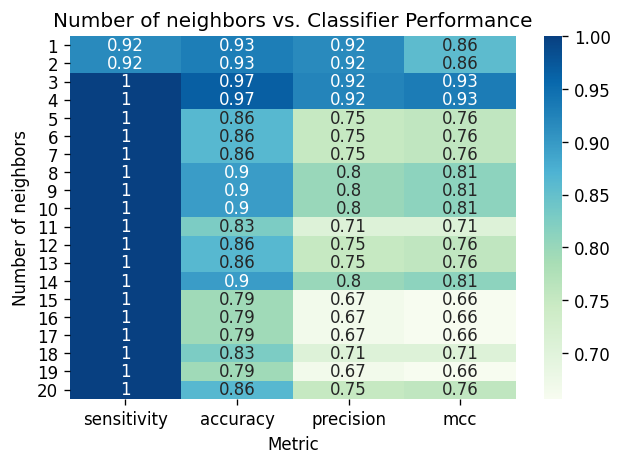

In [18]:
knn_rec = []
knn_acc = []
knn_pre = []
knn_mcc = []
knn_spc = []
num_neighbors = 20

for i in range(1,num_neighbors+1):
    #create the classifier
    clf = neighbors.KNeighborsClassifier(n_neighbors = i, weights="distance")

    # train the classifier
    clf.fit(X_train, y_train)

    # test classifier
    y_pred = clf.predict(X_test)

    # obtain metrics for model
    recall = metrics.recall_score(y_test,y_pred)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    mcc = metrics.matthews_corrcoef(y_test,y_pred)
    specificity = metrics.balanced_accuracy_score(y_test,y_pred)*2 - recall

    knn_rec.append(recall)
    knn_acc.append(accuracy)
    knn_pre.append(precision)
    knn_mcc.append(mcc)
    knn_spc.append(specificity)


df = pd.DataFrame()

df['n'] = [str(x) for x in range(1,num_neighbors+1)]
df['sensitivity'] = knn_rec
df['accuracy'] = knn_acc
df['precision'] = knn_pre
df['mcc'] = knn_mcc

y_axis_labels = [str(x) for x in range(1,num_neighbors+1)]

plt.figure(dpi = 120)
ax = sns.heatmap(df.iloc[:, 1:],
                 cmap = 'GnBu',
                 annot = True,
                 yticklabels = y_axis_labels,
                )
plt.title("Number of neighbors vs. Classifier Performance")
plt.xlabel("Metric")
plt.ylabel("Number of neighbors")
plt.yticks(rotation=0)
plt.show()

Looking at the graph, it is clear that while 16 neighbors does not have the highest sensitivity,
it has the best performance of all the tests. We can run this experiment again, but instead using a uniform weighting

In [19]:
knn_rec = []
knn_acc = []
knn_pre = []
knn_mcc = []
knn_spc = []

for i in range(1,num_neighbors+1):
    #create the classifier
    clf = neighbors.KNeighborsClassifier(n_neighbors = i, weights="uniform")

    # train the classifier
    clf.fit(X_train, y_train)

    # test classifier
    y_pred = clf.predict(X_test)

    # obtain metrics for model
    recall = metrics.recall_score(y_test,y_pred)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    mcc = metrics.matthews_corrcoef(y_test,y_pred)
    specificity = metrics.balanced_accuracy_score(y_test,y_pred)*2 - recall

    knn_rec.append(recall)
    knn_acc.append(accuracy)
    knn_pre.append(precision)
    knn_mcc.append(mcc)
    knn_spc.append(specificity)


overall_rec.append(knn_rec[2])
overall_acc.append(knn_acc[2])
overall_pre.append(knn_pre[2])
overall_mcc.append(knn_mcc[2])
overall_spc.append(knn_spc[2])

In [20]:
df = pd.DataFrame()

df['n'] = [str(x) for x in range(1,num_neighbors+1)]
df['sensitivity'] = knn_rec
df['accuracy'] = knn_acc
df['precision'] = knn_pre
df['mcc'] = knn_mcc


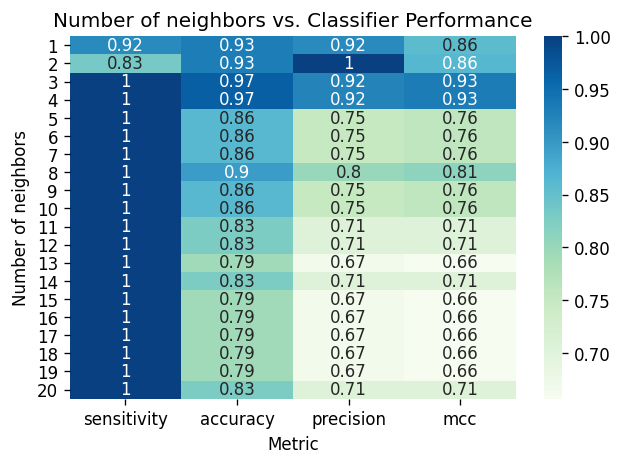

In [21]:
y_axis_labels = [str(x) for x in range(1,num_neighbors+1)]

plt.figure(dpi = 120)
ax = sns.heatmap(df.iloc[:, 1:],
                 cmap = 'GnBu',
                 annot = True,
                 yticklabels = y_axis_labels,
                )
plt.title("Number of neighbors vs. Classifier Performance")
plt.xlabel("Metric")
plt.ylabel("Number of neighbors")
plt.yticks(rotation=0)
plt.show()

Looking at the graph, it is clear that while 19 neighbors does not have the highest sensitivity,
it has the best performance of all the tests.

Overall, it seems that a uniform weighted k nearest neighbors classifier with 19 neighbors performs the best.


# Supervised Learning: Multilayer Perceptron

## MLP: Relu

In [22]:
#create the classifier
# logistic works better than relu
clf = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

In [23]:
# train the classifier
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(15,),
              random_state=1, solver='lbfgs')

In [24]:
# test classifier

y_pred = clf.predict(X_test)

In [25]:
# analyze test_data
# display results in confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

results = pd.crosstab(y_test, y_pred, colnames=['Predicted / Actual'])
results = results.rename(columns={0: 'Non-Meditative', 1: 'Meditative'})
results.index = ['Non-Meditative', 'Meditative']
results

Predicted / Actual,Non-Meditative,Meditative
Non-Meditative,17,0
Meditative,0,12


In [26]:
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Non-Meditative       1.00      1.00      1.00        17
    Meditative       1.00      1.00      1.00        12

      accuracy                           1.00        29
     macro avg       1.00      1.00      1.00        29
  weighted avg       1.00      1.00      1.00        29



In [27]:
# store metrics for comparision amongst other k-nearest-neighbor classifier outputs later

# obtain metrics for model
recall = metrics.recall_score(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
mcc = metrics.matthews_corrcoef(y_test,y_pred)
specificity = metrics.balanced_accuracy_score(y_test,y_pred)*2 - recall

overall_rec.append(recall)
overall_acc.append(accuracy)
overall_pre.append(precision)
overall_mcc.append(mcc)
overall_spc.append(specificity)

# display metrics
print('Multilayer Perceptron - (post-pca)\n')
print('Sensitivity = %.3f' % recall)
print('Accuracy = %.3f' % accuracy)
print('Precision = %.3f' % precision)
print('Matthew Correlation Coefficient = %.3f' % mcc)

Multilayer Perceptron - (post-pca)

Sensitivity = 1.000
Accuracy = 1.000
Precision = 1.000
Matthew Correlation Coefficient = 1.000


# Polynomial SVM

In [28]:
# Create the linear SVM model
lin_model = svm.LinearSVC(tol = 0.001,
                      loss = 'hinge',
                      dual = True,
                      random_state = 42)

# fit model
lin_model.fit(X_train,y_train)

# predict y values from testing data
y_pred = lin_model.predict(X_test)

# confusion matrix
results = pd.crosstab(y_test, y_pred, colnames=['Predicted / Actual'])
results = results.rename(columns={0: 'Non-Meditative', 1: 'Meditative'})
results.index = ['Non-Meditative', 'Meditative']
results


# evaluation metrics of poly svm model
recall = metrics.recall_score(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
mcc = metrics.matthews_corrcoef(y_test,y_pred)
specificity = metrics.balanced_accuracy_score(y_test,y_pred)*2 - recall

overall_rec.append(recall)
overall_acc.append(accuracy)
overall_pre.append(precision)
overall_mcc.append(mcc)
overall_spc.append(specificity)

print('Polynomial SVM\n')
print('Sensitivity = %.3f' % recall)
print('Accuracy = %.3f' % accuracy)
print('Precision = %.3f' % precision)
print('Matthew Correlation Coefficient = %.3f' % mcc)



Polynomial SVM

Sensitivity = 1.000
Accuracy = 1.000
Precision = 1.000
Matthew Correlation Coefficient = 1.000


# Classifier Comparison
Here we will compare the different classifiers

In [29]:
df = pd.DataFrame()

df['classifier'] = ["K-means", "K-nearest neighbors", "Multilayer Perceptron", "Linear SVM"]
df['sensitivity'] = overall_rec
df['specificity'] = overall_spc
df['accuracy'] = overall_acc
df['precision'] = overall_pre
df['mcc'] = overall_mcc

df


,classifier,sensitivity,specificity,accuracy,precision,mcc
0,K-means,0.75,0.000000,0.310345,0.346154,-0.404304
1,K-nearest neighbors,1.00,0.941176,0.965517,0.923077,0.932083
2,Multilayer Perceptron,1.00,1.000000,1.000000,1.000000,1.000000
3,Linear SVM,1.00,1.000000,1.000000,1.000000,1.000000


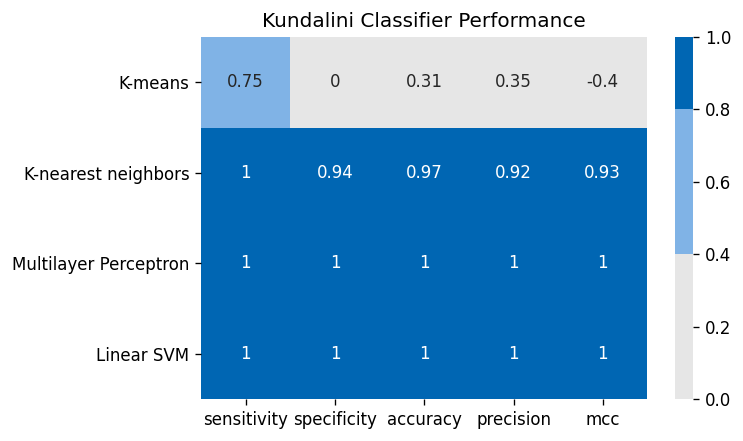

In [30]:
y_axis_labels = ["K-means", "K-nearest neighbors", "Multilayer Perceptron", "Linear SVM"]

plt.figure(dpi = 120)
red = (.9,.9,.9)
yellow = (.5,.7,.9)
green = (0,.4,.7)
my_colors=[red, red, red, red,yellow,yellow,yellow, yellow,green, green]
ax = sns.heatmap(df.iloc[:, 1:],
                 cmap = my_colors,#sns.diverging_palette(15, 125, as_cmap=True),
                 annot = True,
                 yticklabels = y_axis_labels,
                 vmin = 0,
                 vmax = 1
                )
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0,.2,.4,.6,.8,1])
plt.title("Kundalini Classifier Performance")
plt.yticks(rotation=0)
plt.show()